<a href="https://colab.research.google.com/github/avicahiBrevel/light_sim/blob/3d/light_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

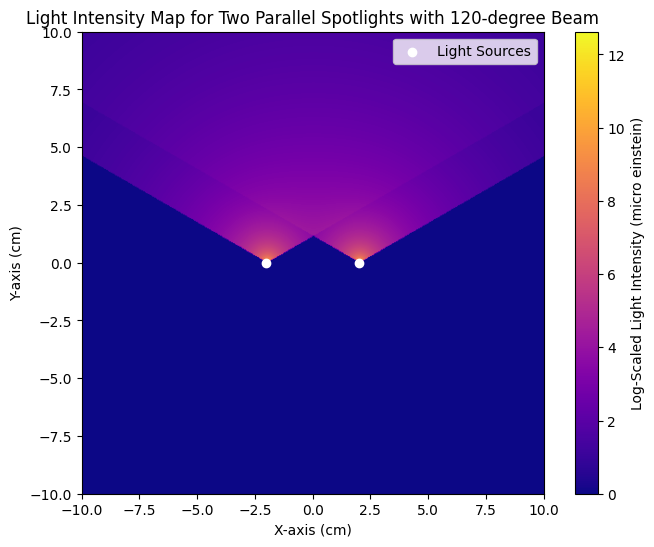

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid size and resolution
x_min, x_max = -10, 10  # in cm
y_min, y_max = -10, 10  # in cm
z_min, z_max = -10, 10  # in cm
resolution = 100

# Create a grid of points
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
z = np.linspace(z_min, z_max, resolution)
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

# Define the positions of the three spotlights
light1 = np.array([-2, 0, 0])  # in cm
light2 = np.array([2, 0, 0])   # in cm
light3 = np.array([0, 0, 2])   # in cm

# Define the direction and beam angle for the spotlights
def is_within_beam(x, y, z, light_pos, direction, beam_angle):
    vector_to_point = np.array([x - light_pos[0], y - light_pos[1], z - light_pos[2]])
    unit_vector_to_point = vector_to_point / (np.linalg.norm(vector_to_point, axis=0) + 1e-6)
    dot_product = np.dot(unit_vector_to_point, direction)
    angle = np.arccos(np.clip(dot_product, -1.0, 1.0)) * 180 / np.pi
    return angle <= beam_angle / 2

# Define a function to calculate light intensity at a point
# Now incorporates spotlight beam angle
def light_intensity(x, y, z, light_pos, direction, beam_angle, intensity=1, attenuation=1):
    mask = is_within_beam(x, y, z, light_pos, direction, beam_angle)
    distance = np.sqrt((x - light_pos[0])**2 + (y - light_pos[1])**2 + (z - light_pos[2])**2)  # in cm
    intensity_values = intensity / (attenuation * distance**2 + 1e-6) * 100  # in micro einstein
    return np.where(mask, intensity_values, 0)

# Spotlight parameters
beam_angle = 120  # in degrees
attenuation_coefficient = 0.5  # Adjust as needed
direction1 = np.array([0, 1, 0])  # Parallel direction for light1 and light2
direction3 = np.array([0, 0, -1])  # Direction for light3

# Calculate the total intensity at each point on the grid
intensity1 = light_intensity(x_grid, y_grid, z_grid, light1, direction1, beam_angle, attenuation=attenuation_coefficient)
intensity2 = light_intensity(x_grid, y_grid, z_grid, light2, direction1, beam_angle, attenuation=attenuation_coefficient)
intensity3 = light_intensity(x_grid, y_grid, z_grid, light3, direction3, beam_angle, attenuation=attenuation_coefficient)
intensity_grid = intensity1 + intensity2 + intensity3

# Sum over z-axis for visualization
intensity_2d = np.sum(intensity_grid, axis=2)

# Apply logarithmic scaling for better visualization
intensity_2d_log = np.log1p(intensity_2d)

# Plot the 3D color map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(
    x_grid[:, :, 0], y_grid[:, :, 0], intensity_2d_log,
    cmap='plasma', edgecolor='none'
)

ax.set_title('3D Light Intensity Map for Three Spotlights')
ax.set_xlabel('X-axis (cm)')
ax.set_ylabel('Y-axis (cm)')
ax.set_zlabel('Log-Scaled Intensity (micro einstein)')
plt.show()
